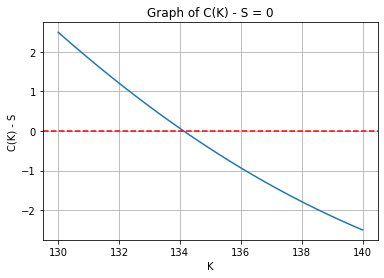

The value of K is 134.13 ¥ per €


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import newton

# Given values
S = 133.95  # spot exchange rate
r = 0.012  # risk-free rate for Yen
T = 1  # time to maturity of the option
sigma = 0.08  # exchange rate volatility
K_2 = 140  # exercise price for the sold call options

# Defining the functions d1 and d2
def d1_func(S, K, r, T, sigma):
    return (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def d2_func(d1, sigma, T):
    return d1 - sigma * np.sqrt(T)

# Black-Scholes formula for a call option
def call_price(S, K, r, T, sigma):
    d1 = d1_func(S, K, r, T, sigma)
    d2 = d2_func(d1, sigma, T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# The equation C(K) - S = 0
def equation(K):
    return call_price(S, K, r, T, sigma) - 2 * call_price(S, K_2, r, T, sigma)

# Solving for K using the Newton-Raphson method
K_1 = newton(equation, 130)  # starting with an initial guess of 130

# Plotting the function
K_values = np.linspace(130, 140, 100)  # range of K values
equation_values = [equation(K) for K in K_values]  # corresponding equation values

plt.plot(K_values, equation_values)
plt.axhline(0, color='red', linestyle='--')  # horizontal line at y=0
plt.xlabel('K')
plt.ylabel('C(K) - S')
plt.title('Graph of C(K) - S = 0')
plt.grid(True)
plt.show()

print(f"The value of K is {K_1:.2f} ¥ per €")